<a href="https://colab.research.google.com/github/shreya0202/Perceptron/blob/main/HalfMoonData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
from random import *
from matplotlib import pyplot as plt
import math
from math import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Perceptron class
class SL_Perceptron(object):
    
    def __init__(self, num_samples):
        # Initialises the weights with all zeros and sets the learning rate
        self.w = np.zeros(num_samples)
        self.lr = 0.01
        
    def update_weights(self, sample, error):
        # In case of a misclassification, update the weight vector
        for i in range(len(sample)):
            self.w[i] += (self.lr * sample[i] * error)

    def output_sigmoid(self, samples):
        # Calculates the sum of products of weights(W) and samples(X) 
        # and returns the sigmoid of that value
        value = 0
        
        for i in range(len(samples)):
            value += samples[i]*self.w[i]
             
        return float(1/(1+exp(-value)))
    
    def result(self, sample):
        res = self.output_sigmoid(sample)
        if(res > 0.5):
            return 1
        elif(res <= 0.5):
            return 0
        else:
            return -1

In [ ]:
def make_half_moons(n_samples, radius, width, distance):
    # Initialise dummy variables
    num_rows = 3
    num_cols = n_samples
    r = radius
    w = width
    d = distance
    
    # Check for boundary conditions
    if(r < w/2):
        print("\nError: Radius should atleast be larger than half the width.")
            
    if(num_cols%2 != 0):
        print("\nError: Number of samples should be even.")
        num_cols -= 1
    
    # Create random 2D array of floats between 0.0 and 1.0
    a = np.random.rand(num_rows, num_cols//2)
    
    # Define rad for first half of records
    rad = (r - w/2) + w*a[0][:]
    
    # Define theta for second half of records
    theta = np.pi*a[1][:]
    
    # Create data-set
    # First half-moon data
    x1 = np.multiply(rad, np.cos(theta))
    y1 = np.multiply(rad, np.sin(theta))
    label1 = 1*np.ones((1, len(x1)), dtype=int)
    label1 = np.hstack(label1)
    
    # Second half-moon data
    x2 = np.multiply(rad, np.cos(-theta)) + r
    y2 = np.multiply(rad, np.sin(-theta)) - d
    label2 = 0*np.ones((1, len(x2)), dtype=int)
    label2 = np.hstack(label2)
    
    # Create dataset by combining all values of x's and y's and
    # labels, and shuffling them randomly.
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    labels = np.concatenate((label1, label2))
    
    # Create coordinate-type dataset from individual values
    # so that we have a dataset of type Xi = [[x, y], label]
    X = np.zeros((len(x), 2))
    k = 0
    for i, j in zip(x, y):
        X[k][0] = i
        X[k][1] = j
        k += 1

    data_set = [X, labels]
        
    # Plot a half-moon graph for given dataset
    plt.plot(x1, y1, "r.", x2, y2, "b.")
    plt.show()
    
    return data_set

In [ ]:
def model_training(input_train, output_train, pptron):
    
    print("\n\n----------Training----------")
    total_train_samples = len(input_train)
    print("\nNumber of testing data points: {}\n".format(total_train_samples))
    
    epochs = 0
    
    while(epochs < 50):

        x_data = []
        i = 0
        # Iterate over each record in training-data
        for sample in input_train:
                     
            flag = 0
            
            # Calculate output using sigmoid of each iteration
            output = pptron.output_sigmoid(sample[0])
            
            # Calculate error signal
            # Not to be calculated in case of testing
            error = sample[1] - output
            
            # Check for result accuracy
            flag = pptron.result(sample[0])
            x_data = np.append(x_data, flag)

            # Update weights according to error signal
            # Not to be done in case of testing since we need pre-trained weight vectors
            pptron.update_weights(sample[0], error)
            
        accuracy = (accuracy_score(y_true=output_train, y_pred=x_data)) * 100
        if(epochs%5 == 0):
            print("Epoch {}: Training Accuracy metric: {}%".format(epochs, round(accuracy, 2)))
                    
        epochs += 1

In [ ]:
def model_testing(input_test, output_test, pptron):
    
    print("\n\n-----------Testing-----------")
    total_test_samples = len(input_test)
    print("\nNumber of testing data points: {}\n".format(total_test_samples))
    
    # Set limit to number of epochs = 30 in while loop
    epochs = 0
    x_data = []
    i = 0
    
    # Iterate over each record in training-data
    for sample in input_test:           
        flag = 0  
        # Calculate output using sigmoid of each iteration
        # print("\nSample under review: {}".format(sample))
        output = pptron.output_sigmoid(sample[0])
 
        # Check for result accuracy
        flag = pptron.result(sample[0])
        x_data = np.append(x_data, flag)

    accuracy = (accuracy_score(y_true=output_test, y_pred=x_data)) * 100
    print("Testing Accuracy metric: {}%".format(round(accuracy, 2)))

In [ ]:
def main():
  # Create data by calling make_half_moons method
  data = make_half_moons(4000, 10, 8, 0)

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.5, random_state=42)

  # Create a tuple of the training data-set to be used for weight updation
  # and error signal calculation
  training_data = list(zip(X_train, y_train))
  testing_data = list(zip(X_test, y_test))

  # Create SL_Perceptron object
  perceptron = SL_Perceptron(len(data[0][0]))

  model_training(training_data, y_train, perceptron)
      
  model_testing(testing_data, y_test, perceptron)

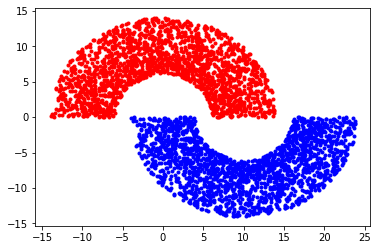



----------Training----------

Number of testing data points: 2000

Epoch 0: Training Accuracy metric: 98.65%
Epoch 5: Training Accuracy metric: 99.6%
Epoch 10: Training Accuracy metric: 99.65%
Epoch 15: Training Accuracy metric: 99.65%
Epoch 20: Training Accuracy metric: 99.65%
Epoch 25: Training Accuracy metric: 99.7%
Epoch 30: Training Accuracy metric: 99.7%
Epoch 35: Training Accuracy metric: 99.7%
Epoch 40: Training Accuracy metric: 99.7%
Epoch 45: Training Accuracy metric: 99.7%


-----------Testing-----------

Number of testing data points: 2000

Testing Accuracy metric: 99.95%


In [ ]:
main()